In [1]:
#im using CPU hehe
import torch

if torch.cuda.is_available():
  device = torch.device('cuda')

  print('there are %d GPU(s) available.' % torch.cuda.device_count())

  print('we will use the GPU: ', torch.cuda.get_device_name(0))

else:
  print("No GPU available, using the CPU instead")
  device = torch.device("cpu")

No GPU available, using the CPU instead


In [2]:
#do pip install transformers if haven't
!pip install transformers

You should consider upgrading via the 'C:\Users\tiffa\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [3]:
import pandas as pd

df = pd.read_csv("./GenshinReview.csv")
df.shape

(3773, 2)

In [4]:
df.sample(10)

,score,content
1421,3,overall a really great game but lacking in coo...
1547,3,its a good game but on mobile there is a glitc...
1315,2,before i begin i wanted to like this game unfo...
1229,2,horribly optimized for phone barely optimized ...
3617,5,the game itself is amazing wonderful graphics ...
3364,5,whats up with the review deletion anyway love ...
2703,4,game is good please make use of the jump butto...
2282,3,the game is awesome but that is not the proble...
1562,3,i have always loved you game but one day you a...
1472,3,the game has basically become mid quests after...


In [31]:
#creating label called sentiment from the score reviews
#1-2: negative
#3: neutral
#4-5: positive

def map_rating_to_sentiment(rating):
    if rating in [1, 2]:
        return 0
    elif rating == 3:
        return 1
    elif rating in [4, 5]:
        return 2

df['sentiment'] = df['score'].apply(map_rating_to_sentiment)

df.head(100)

,score,content,sentiment
0,1,for whatever reason my game used to work just ...,0
1,1,i do like this game but there is seriously thi...,0
2,1,downloaded it once and it worked downloaded it...,0
3,1,my data is mbps when i open this game the ms s...,0
4,1,i have not played the game because of some pro...,0
...,...,...,...
95,1,honest review from a adventure rank player gen...,0
96,1,this game is incredible in every way story gam...,0
97,1,even account creation process was close to imp...,0
98,1,i have been playing adventure rank for three y...,0


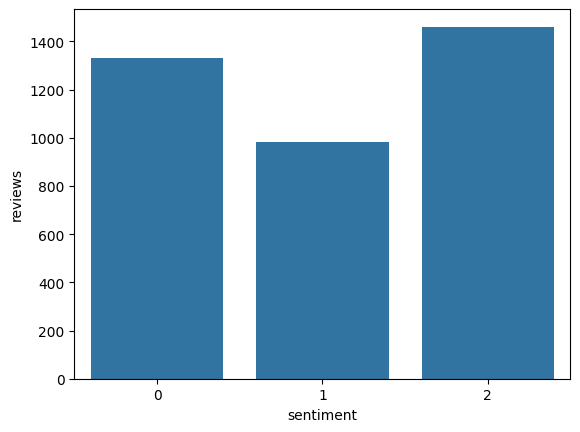

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

#for now we have 2000 rows of reviews. we'll add more data perhaps later if the accuracy is still bad.
x = df.sentiment.value_counts()
sns.barplot(x=x.index, y=x)
plt.gca().set_ylabel('reviews')
plt.show()

In [9]:
sentences = df.content.values
labels = df.sentiment.values

In [13]:
from transformers import BertTokenizer
#using pretrained bert tokenizer
print("Loading BERT Tokenizer")
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

Loading BERT Tokenizer


tokenizer_config.json: 100%|████████████████████████████████████████████████████████| 28.0/28.0 [00:00<00:00, 18.1kB/s]
C:\Users\tiffa\AppData\Local\Programs\Python\Python310\lib\site-packages\huggingface_hub\file_download.py:147: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\tiffa\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)

In [14]:
print("Original: ", sentences[0])
#yes it's not perfect, game word terms like primogems are not identified as english word.
print("Tokenized: ", tokenizer.tokenize(sentences[0]))
#tokenization time
print("Token IDS: ", tokenizer.convert_tokens_to_ids(tokenizer.tokenize(sentences[0])))

Original:  for whatever reason my game used to work just fine except for cutscenes when it crashed and would not play so i had to use geforce but now it just refuses to open it opens up shows a black screen and promptly crashes again i have tried uninstalling and reinstalling took about three hours by the way and restarting my device it just does not work fun game though
Tokenized:  ['for', 'whatever', 'reason', 'my', 'game', 'used', 'to', 'work', 'just', 'fine', 'except', 'for', 'cuts', '##cene', '##s', 'when', 'it', 'crashed', 'and', 'would', 'not', 'play', 'so', 'i', 'had', 'to', 'use', 'ge', '##force', 'but', 'now', 'it', 'just', 'refuses', 'to', 'open', 'it', 'opens', 'up', 'shows', 'a', 'black', 'screen', 'and', 'promptly', 'crashes', 'again', 'i', 'have', 'tried', 'un', '##ins', '##tal', '##ling', 'and', 'reins', '##tal', '##ling', 'took', 'about', 'three', 'hours', 'by', 'the', 'way', 'and', 'restart', '##ing', 'my', 'device', 'it', 'just', 'does', 'not', 'work', 'fun', 'game',

In [15]:
input_ids = []

for sent in sentences:
  encoded_sent = tokenizer.encode(
      sent,
      add_special_tokens = True
  )
  input_ids.append(encoded_sent)

print("Original: ", sentences[0])
print("Token IDs: ", input_ids[0])


Original:  for whatever reason my game used to work just fine except for cutscenes when it crashed and would not play so i had to use geforce but now it just refuses to open it opens up shows a black screen and promptly crashes again i have tried uninstalling and reinstalling took about three hours by the way and restarting my device it just does not work fun game though
Token IDs:  [101, 2005, 3649, 3114, 2026, 2208, 2109, 2000, 2147, 2074, 2986, 3272, 2005, 7659, 17968, 2015, 2043, 2009, 8007, 1998, 2052, 2025, 2377, 2061, 1045, 2018, 2000, 2224, 16216, 14821, 2021, 2085, 2009, 2074, 10220, 2000, 2330, 2009, 7480, 2039, 3065, 1037, 2304, 3898, 1998, 13364, 19119, 2153, 1045, 2031, 2699, 4895, 7076, 9080, 2989, 1998, 19222, 9080, 2989, 2165, 2055, 2093, 2847, 2011, 1996, 2126, 1998, 23818, 2075, 2026, 5080, 2009, 2074, 2515, 2025, 2147, 4569, 2208, 2295, 102]


In [16]:
print("Max sentence length: ", max([len(sen) for sen in input_ids]))

Max sentence length:  262


In [17]:
from keras.preprocessing.sequence import pad_sequences

MAX_LEN = 64

print("Padding/truncating all sentences to %d values" % MAX_LEN)
print('Padding token: "{:}", ID: {:}'.format(tokenizer.pad_token, tokenizer.pad_token_id))

input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, dtype='long', value=0, truncating='post', padding='post')

print("Done")


Padding/truncating all sentences to 64 values
Padding token: "[PAD]", ID: 0
Done


In [18]:
input_ids[0]

array([  101,  2005,  3649,  3114,  2026,  2208,  2109,  2000,  2147,
        2074,  2986,  3272,  2005,  7659, 17968,  2015,  2043,  2009,
        8007,  1998,  2052,  2025,  2377,  2061,  1045,  2018,  2000,
        2224, 16216, 14821,  2021,  2085,  2009,  2074, 10220,  2000,
        2330,  2009,  7480,  2039,  3065,  1037,  2304,  3898,  1998,
       13364, 19119,  2153,  1045,  2031,  2699,  4895,  7076,  9080,
        2989,  1998, 19222,  9080,  2989,  2165,  2055,  2093,  2847,
        2011])

In [19]:
attention_mask = []

for sent in input_ids:
  att_mask = [int(token_id > 0) for token_id in sent]

  attention_mask.append(att_mask)

In [20]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_labels, test_labels = train_test_split(input_ids,labels, random_state=42, test_size=0.1)
train_mask, test_mask, _, _ = train_test_split(attention_mask, labels, random_state=42, test_size=0.1)

train_input, validation_input, train_labels, validation_labels = train_test_split(train_input, train_labels, random_state= 43, test_size=0.15)
train_mask, validation_mask, _, _ = train_test_split(train_mask, train_mask, random_state=43, test_size=0.15)

In [21]:
import numpy as np
print("== Train ==")
print("Input: ", train_input.shape)
print("Label: ", train_labels.shape)
print("Mask: ", np.array(train_mask).shape)

print("\n== Validation ==")
print("Input: ", validation_input.shape)
print("Label: ", validation_labels.shape)
print("Mask: ", np.array(validation_mask).shape)

print("\n== Test ==")
print("Input: ", test_input.shape)
print("Label: ", test_labels.shape)
print("Mask: ", np.array(test_mask).shape)

== Train ==
Input:  (2885, 64)
Label:  (2885,)
Mask:  (2885, 64)

== Validation ==
Input:  (510, 64)
Label:  (510,)
Mask:  (510, 64)

== Test ==
Input:  (378, 64)
Label:  (378,)
Mask:  (378, 64)


In [22]:
train_input = torch.tensor(train_input)
train_labels = torch.tensor(train_labels)
train_mask = torch.tensor(train_mask)

validation_input = torch.tensor(validation_input)
validation_labels = torch.tensor(validation_labels)
validation_mask = torch.tensor(validation_mask)

test_input = torch.tensor(test_input)
test_labels = torch.tensor(test_labels)
test_mask = torch.tensor(test_mask)

In [23]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

batch_size = 32

train_data = TensorDataset(train_input, train_mask, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

validation_data = TensorDataset(validation_input, validation_mask, validation_labels)
validation_sampler = SequentialSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size)

test_data = TensorDataset(test_input, test_mask, test_labels)
test_sampler = SequentialSampler(test_data)
test_dataloader = DataLoader(test_data, sampler=test_sampler, batch_size=batch_size)

In [24]:
from transformers import BertForSequenceClassification, AdamW, BertConfig

model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased",
    num_labels = 3,
    output_attentions = False,
    output_hidden_states = False
)


model.safetensors: 100%|█████████████████████████████████████████████████████████████| 440M/440M [07:46<00:00, 945kB/s]
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [25]:
params = list(model.named_parameters())

print("The BERT model has {:} different named parameters.".format(len(params)))

print("==== Embedding Layer ====")
for p in params[0:5]:
  print("{:<60} {:>12}".format(p[0], str(tuple(p[1].size()))))

print("==== First Transformers ====")
for p in params[5:21]:
  print("{:<60} {:>12}".format(p[0], str(tuple(p[1].size()))))

print("==== Output Layer ====")
for p in params[-4:]:
  print("{:<60} {:>12}".format(p[0], str(tuple(p[1].size()))))

The BERT model has 201 different named parameters.
==== Embedding Layer ====
bert.embeddings.word_embeddings.weight                       (30522, 768)
bert.embeddings.position_embeddings.weight                     (512, 768)
bert.embeddings.token_type_embeddings.weight                     (2, 768)
bert.embeddings.LayerNorm.weight                                   (768,)
bert.embeddings.LayerNorm.bias                                     (768,)
==== First Transformers ====
bert.encoder.layer.0.attention.self.query.weight               (768, 768)
bert.encoder.layer.0.attention.self.query.bias                     (768,)
bert.encoder.layer.0.attention.self.key.weight                 (768, 768)
bert.encoder.layer.0.attention.self.key.bias                       (768,)
bert.encoder.layer.0.attention.self.value.weight               (768, 768)
bert.encoder.layer.0.attention.self.value.bias                     (768,)
bert.encoder.layer.0.attention.output.dense.weight             (768, 768)
bert.e

In [26]:
optimizer = AdamW(
    model.parameters(),
    lr = 2e-5,
    eps = 1e-8
)

C:\Users\tiffa\AppData\Local\Programs\Python\Python310\lib\site-packages\transformers\optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [27]:
from transformers import get_linear_schedule_with_warmup

epochs = 24

total_steps = len(train_dataloader) * epochs

scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps = 0, num_training_steps = total_steps)

In [28]:
import numpy as np

def flat_accuracy(preds, labels):
  pred_flat = np.argmax(preds, axis=1).flatten()
  labels_flat = labels.flatten()
  return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [29]:
import time
import datetime

def format_time(elapsed):
  elapsed_rounded = int(round(elapsed))
  return str(datetime.timedelta(seconds=elapsed_rounded))

In [30]:
import random
#to make sure it's the same
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)

loss_values = []

for epoch_i in range(0, epochs):

#Training time
  print("======= Epoch {:} / {:} =======".format(epoch_i+1, epochs))
  print("Training...")

  t0 = time.time()

  total_loss = 0
#only to prepare the model in a state of where it's ready for training
  model.train()

  #for each batch of training data
  for step, batch in enumerate(train_dataloader):
    
    #progress update every 10 batches
    if step % 10 == 0 and not step == 0:
      elapsed = format_time(time.time() - t0)

      print("Batch {:>5,} of {:>5,}.     Elapsed: {:}".format(step, len(train_dataloader), elapsed))
    
    b_input_ids = batch[0].to(device)
    b_input_mask = batch[1].to(device)
    b_labels = batch[2].to(device)

    model.zero_grad()

    outputs = model(b_input_ids,
                    token_type_ids=None,
                    attention_mask=b_input_mask,
                    labels=b_labels)
    
    loss = outputs[0]
    total_loss += loss.item()
    loss.backward()
    torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
    optimizer.step()
    scheduler.step()

  avg_train_loss = total_loss / len(train_dataloader)
  loss_values.append(avg_train_loss)

  print("   Average training loss: {0:.2f}".format(avg_train_loss))
  print("   Training epoch took: {:}".format(format_time(time.time() - t0)))

#validation time
  print("Running Validation...")
  t0 = time.time()
  model.eval()
  eval_loss, eval_accuracy = 0, 0
  nb_eval_steps, nb_eval_examples = 0, 0

  for batch in validation_dataloader:
    batch = tuple(t.to(device) for t in batch)
    b_input_ids, b_input_mask, b_labels = batch
    with torch.no_grad():
      outputs = model(b_input_ids,
                      token_type_ids=None,
                      attention_mask=b_input_mask)
    
    logits = outputs[0]
    logits = logits.detach().cpu().numpy()
    label_ids = b_labels.to('cpu').numpy()

    tmp_eval_accuracy = flat_accuracy(logits, label_ids)
    eval_accuracy += tmp_eval_accuracy
    nb_eval_steps += 1
  
  print("   Accuracy: {0:.2f}".format(eval_accuracy/nb_eval_steps))
  print("   Validation took: {:}".format(format_time(time.time() - t0)))

print("Training complete!")

======= Epoch 1 / 24 =======
Training...
Batch    10 of    91.     Elapsed: 0:03:25
Batch    20 of    91.     Elapsed: 0:05:42
Batch    30 of    91.     Elapsed: 0:08:02
Batch    40 of    91.     Elapsed: 0:10:20
Batch    50 of    91.     Elapsed: 0:12:38
Batch    60 of    91.     Elapsed: 0:14:56
Batch    70 of    91.     Elapsed: 0:17:13
Batch    80 of    91.     Elapsed: 0:19:30
Batch    90 of    91.     Elapsed: 0:21:47
   Average training loss: 0.96
   Training epoch took: 0:21:49
Running Validation...
   Accuracy: 0.62
   Validation took: 0:01:13
======= Epoch 2 / 24 =======
Training...
Batch    10 of    91.     Elapsed: 0:02:21
Batch    20 of    91.     Elapsed: 0:04:36
Batch    30 of    91.     Elapsed: 0:06:52
Batch    40 of    91.     Elapsed: 0:09:10
Batch    50 of    91.     Elapsed: 0:11:23
Batch    60 of    91.     Elapsed: 0:13:34
Batch    70 of    91.     Elapsed: 0:15:47
Batch    80 of    91.     Elapsed: 0:17:59
Batch    90 of    91.     Elapsed: 0:20:16
   Average tr

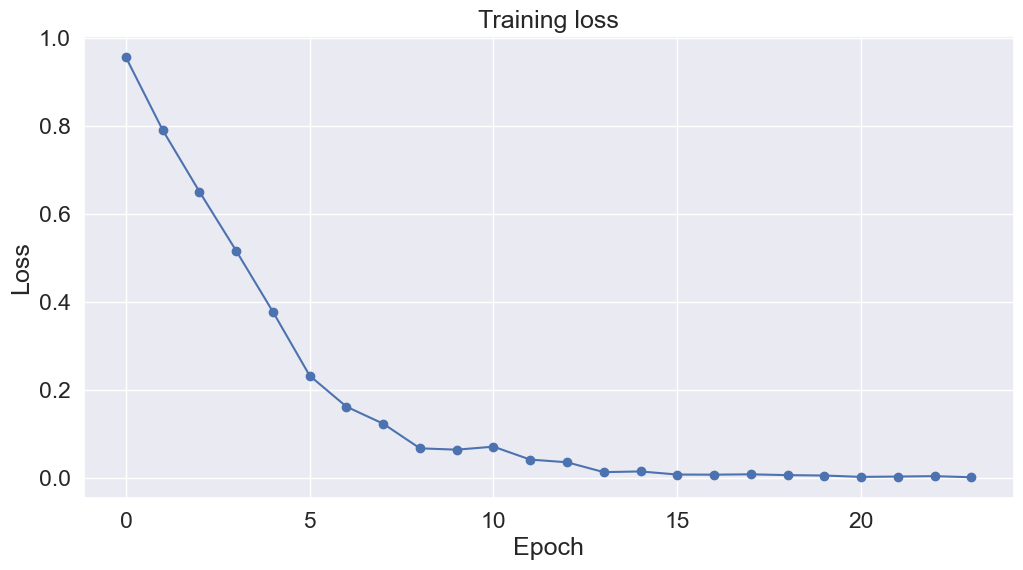

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt


#plotting will be continued once this thing is done training bro
import seaborn as sns

sns.set(style='darkgrid')

sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

plt.plot(loss_values, 'b-o')

plt.title("Training loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.show()

In [33]:
print("Predicting labels for {:,} test sentences".format(len(test_input)))

model.eval()

prediction, true_labels = [], []

for batch in test_dataloader:
  batch = tuple(t.to(device) for t in batch)

  b_input_ids, b_input_mask, b_labels = batch

  with torch.no_grad():
    outputs = model(b_input_ids,
                    token_type_ids=None,
                    attention_mask=b_input_mask)
    
  logits = outputs[0]

  logits = logits.detach().cpu().numpy()
  label_ids = b_labels.to('cpu').numpy()

  prediction.append(logits)
  true_labels.append(label_ids)

print("finally??? done!!!!")

Predicting labels for 378 test sentences
finally??? done!!!!


In [34]:
import numpy as np
import pandas as pd

# Assuming prediction and true_labels are lists

# Convert lists to NumPy arrays
prediction_array = np.concatenate(prediction, axis=0)
true_labels_array = np.concatenate(true_labels, axis=0)

# Create a DataFrame
df = pd.DataFrame({
    'Predicted_Labels': np.argmax(prediction_array, axis=1), 
    'True_Labels': true_labels_array
})

# Display the DataFrame
print(df)

     Predicted_Labels  True_Labels
0                   2            0
1                   2            2
2                   2            2
3                   2            1
4                   0            0
..                ...          ...
373                 0            0
374                 0            0
375                 1            0
376                 2            1
377                 1            1

[378 rows x 2 columns]


In [35]:
from sklearn.metrics import matthews_corrcoef, accuracy_score, precision_score, recall_score, f1_score


#convert lists to NumPy arrays
flat_prediction = np.concatenate(prediction, axis=0)
flat_true_labels = np.concatenate(true_labels, axis=0)

#calculate Matthews Correlation Coefficient
mcc = matthews_corrcoef(flat_true_labels, np.argmax(flat_prediction, axis=1))

print("MATTHEWS_CC: %.3f" % mcc)

#calculate Accuracy
acc = accuracy_score(flat_true_labels, np.argmax(flat_prediction, axis=1))

print("ACCURACY: %.3f" % acc)

#calculate Precision
precision = precision_score(flat_true_labels, np.argmax(flat_prediction, axis=1), average='weighted')

print("PRECISION: %.3f" % precision)

#calculate Recall
recall = recall_score(flat_true_labels, np.argmax(flat_prediction, axis=1), average='weighted')

print("RECALL: %.3f" % recall)

#calculate F1-Score
f1 = f1_score(flat_true_labels, np.argmax(flat_prediction, axis=1), average='weighted')

print("F1 SCORE: %.3f" % f1)

MATTHEWS_CC: 0.489
ACCURACY: 0.656
PRECISION: 0.692
RECALL: 0.656
F1 SCORE: 0.666


In [36]:
import pandas as pd
from sklearn.metrics import accuracy_score

#add a column to df indicating whether the prediction is correct
df['Correct_Prediction'] = df['True_Labels'] == df['Predicted_Labels']

#calculate accuracy
accuracy = accuracy_score(df['True_Labels'], df['Predicted_Labels'])
print("Overall Accuracy: {:.2%}".format(accuracy))

#amount of correct predictions for each sentiment class
for sentiment_class in [0, 1, 2]:  #0 for negative, 1 for neutral, 2 for positive
    correct_predictions = df[df['Correct_Prediction'] & (df['True_Labels'] == sentiment_class)].shape[0]
    total_samples = df[df['True_Labels'] == sentiment_class].shape[0]
    print("Correct {} predictions: {}/{}".format(sentiment_class, correct_predictions, total_samples))

Overall Accuracy: 65.61%
Correct 0 predictions: 82/139
Correct 1 predictions: 50/90
Correct 2 predictions: 116/149


In [37]:
df.head(10)

,Predicted_Labels,True_Labels,Correct_Prediction
0,2,0,False
1,2,2,True
2,2,2,True
3,2,1,False
4,0,0,True
5,1,1,True
6,2,2,True
7,1,0,False
8,2,2,True
9,1,2,False


In [38]:
#drop the 'Correct_Prediction' column if not needed
df = df.drop(columns=['Correct_Prediction'])
df.head(10)

,Predicted_Labels,True_Labels
0,2,0
1,2,2
2,2,2
3,2,1
4,0,0
5,1,1
6,2,2
7,1,0
8,2,2
9,1,2
